In [6]:
###remember our essential utility commands
import cv2 #this makes OpenCV available
%pylab inline 
#%pylab notebook 
#this makes for nice figure generation, and brings numpy and matplotlib functions into
                #our namespace
    
###if you're not using notebooks, run:
#from numpy import *
#from matplotlib.pyplot import *
#also make sure to call show() in order to display plots

###note that the preferred convention for shared projects is
#import numpy as np
#import matplotlib.pyplot as plt
###in which case you have to prefix things like np.zeros(5) instead of just zeros(5), 
###and plt.imshow() instead of just imshow()


Populating the interactive namespace from numpy and matplotlib


In [7]:
#change dir to your working space
%cd /home/jack/Desktop/dl_course/mcut_dl_day2_2/data
#your command will be different depending on your setup


/home/jack/Desktop/dl_course/mcut_dl_day2_2/data


In [10]:
#let's load a nice picture
bfly = imread('butterfly.jpg')
#don't forget to take advantage of tab-completion; it works for python syntax as well as filenames


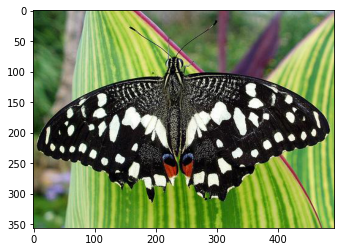

In [11]:
#there are many ways to display an image, but let's use this for now:
figure()
imshow(bfly)


In [12]:
#many algorithms operate on grayscale, and grayscale is easier to work on
bflygray = cv2.cvtColor(bfly,cv2.COLOR_BGR2GRAY)


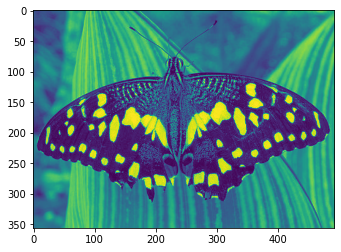

In [13]:
figure()
imshow(bflygray)


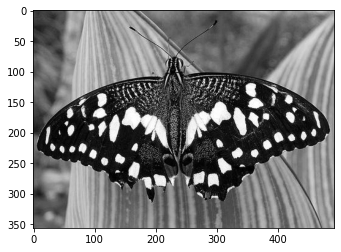

In [14]:
#you may or may not want the default rainbow map
figure()
imshow(bflygray,cmap='gray')


In [15]:
#let's make sure we understand our data
print(bfly.shape)
print(bflygray.shape)


(356, 493, 3)
(356, 493)


#the format above is (height, width, numchannels)
#if numchannels = 1, as is for grayscale, it is omitted
#for RGB/BGR/HSV color images, numchannels=3
#you could have numchannels=4
#this happens for RGBA (Red,Green,Blue,Alpha) images
#Alpha is transparency (0=transparent, 1 or 255 (depending on your datatype) = opaque)

In [29]:
#also remember how to get the data type
bfly.dtype #note I'm dropping the print statement; 
#this is okay for interactive work where you only care about the last output


dtype('uint8')

In [16]:
#uint8, which means integers in the 0-255 range, is standard for everyday camera images
#for scientific purposes, floating point is often used
bflyfloat = bflygray.astype(double)/255.0 #we typically want these in the 0-1 range


In [17]:
bflyfloat.dtype


dtype('float64')

In [18]:
#going back to dimensions, how do we get the image width and height in convenient variables?
height, width = bflygray.shape[0:2]


In [34]:
height, width


(356, 493)

In [35]:
#Notes:
#always remember that the y dimension comes first (just like in Matlab), hence height is before width
#when indexing, [0:2] is only 0 and 1, not 0,1,2
#Python uses a 0:N-1 convention, which is handy when you get used to it, but can trip up newcomers
#what would you expect the following to do?
print(arange(5))


[0 1 2 3 4]


In [15]:
#also, you might see something like this in people's code
height, width = bflygray.shape[:2]


In [36]:
height, width


(356, 493)

In [37]:
#works just the same; when you leave an index blank, it's assumed to be
#the first or last element, depending on whether it's on the left or right of the :
bfly.shape[:]


(356, 493, 3)

In [38]:
#also useful to know how to access the last, second to last etc elements
print(bfly.shape[-1])
print(bfly.shape[-2])
print(bfly.shape[-3])


3
493
356


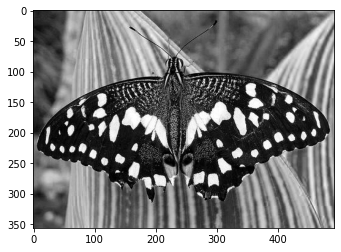

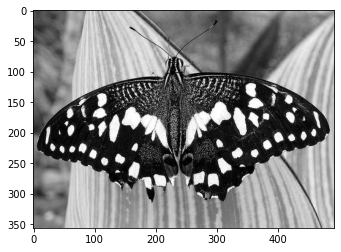

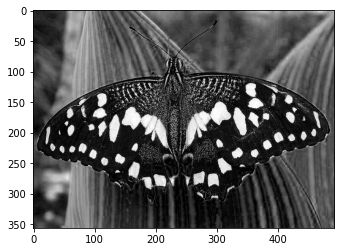

In [19]:
#you can probably guess how to extract RGB channels:
redc = bfly[:,:,0]
greenc = bfly[:,:,1]
bluec = bfly[:,:,2]

figure()
imshow(redc,cmap='gray')

figure()
imshow(greenc,cmap='gray')

figure()
imshow(bluec,cmap='gray')

In [40]:
#note that these will all be singleton in the numchannels dimension
bluec.shape


(356, 493)

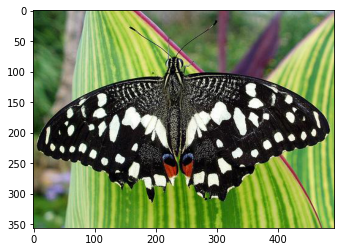

In [20]:
#how to recombine?
#first create a new blank image of the proper dimensions
combined = zeros((height,width,3),uint8)
#be careful that the dimensions are given as a tuple rather than individual arguments
combined[:,:,0]=redc
combined[:,:,1]=greenc
combined[:,:,2]=bluec

figure()
imshow(combined)


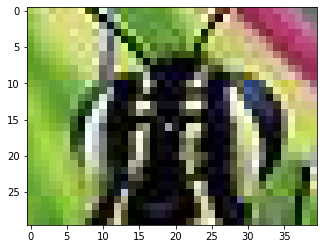

In [21]:
#it's easy to extract a region of interest from an image
#let's say we want to examine the butterfly's head more closely;
#we can get a bounding box from the figure above
bflyhead = bfly[70:100,210:250]

figure()
imshow(bflyhead)


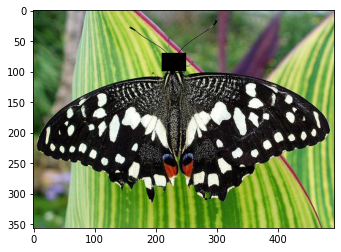

In [32]:
#writing to pixels is also simple:
bfly = np.array(bfly)
bfly[70:100,210:250] = 0
figure()
imshow(bfly)


Suggested test-your-knowledge exercises:
1.  Take an image and write a big + sign over it (ie two blocks of black pixels; one extending from top to bottom, one from left to right, but not occupying the whole image)
2.  Create a function that will take in two images and return an image that combines them into a larger side-by-side image
Should be something like


In [33]:
def sidebyside(imageleft,imageright):
    newimheight=...
    newimwidth=...
    newim = zeros(...)
    ...
    ...
    ...
    return newim
#note this won't run as-is


 Pay attention to indentation!  Python requires code blocks to have consistent indentation (painful at first but makes for great code readability)

In [34]:
#numpy addition vs OpenCV addition
#numpy does modular addition
#ie 250+10 =4  (assuming uint8/mod255)
#OpenCV saturates
x = np.uint8([250])
y = np.uint8([10])
cv2.add(x,y)
#this tends to be what you want for combining images
#cv2.subtract works similarly
#of course, images will have to be the same dimension for addition/subtraction to work


array([[255]], dtype=uint8)

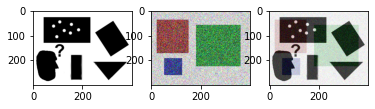

In [35]:
#image weighted blending
img1 = imread('pic1.png')
img2 = imread('pic2.png')
#alpha = 0.7, 0.3=1-0.7; make sure those values add to 1 
# if you want "conserve brightness"
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

figure()
subplot(1,3,1)
imshow(img1)
subplot(1,3,2)
imshow(img2)
subplot(1,3,3)
imshow(dst)






<br><br><br><br><br><br><br>
Image filtering in OpenCV

Lowpass filtering

Text(0.5, 1.0, 'Box-car blurred')

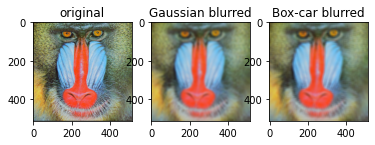

In [47]:
baboon = imread('baboon.jpg')
babblur = cv2.GaussianBlur(baboon,(29,29),0)

#custom kernel; simple box-car in this case
kernel = np.ones((15,15),np.float32)
kernel /= kernel.size #normalize kernel so as not to scale image intensity

babblur2 = cv2.filter2D(baboon,-1,kernel)

figure()
subplot(1,3,1)
imshow(baboon)
title('original')
subplot(1,3,2)
imshow(babblur)
title('Gaussian blurred')
subplot(1,3,3)
imshow(babblur2)
title('Box-car blurred')

#filter2D is very general and can do many different things; with the right kernel
#you can just as easily do high-pass filtering


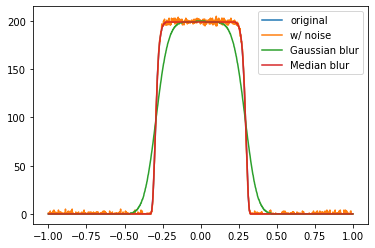

In [48]:
#Median blurring
#an edge-preserving filter
t = linspace(-1.0,1,1000)
y =  200* (exp(-(t/0.3)**20)  )
yn = y + 200*random.normal(scale=0.01,size=t.shape)
yn[yn<0]=0
y = y.astype(uint8)
yn = yn.astype(uint8)
 
 
figure()
plot(t,y)
 
plot(t,yn)
 
ygb = cv2.GaussianBlur(y,(199,199),0)
plot(t,ygb)
 
ymb = cv2.medianBlur(y,199)
plot(t,ymb)
 
legend(['original', 'w/ noise','Gaussian blur', 'Median blur'])

Text(0.5, 1.0, 'cartoonified')

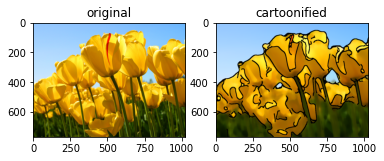

In [49]:
#fun demonstration of median-blur to "cartoonify" a real image
tulips = imread('Tulips.jpg')
tublur = cv2.medianBlur(tulips,29)


#we'll cover Canny edge detection and dilation shortly
edge=cv2.Canny(tublur,10,150)
kernel = np.ones((5,5),np.uint8)
edge = cv2.dilate(edge,kernel,iterations = 1)
tublur[edge==255]=0

figure()
subplot(1,2,1)
imshow(tulips)
title('original')
subplot(1,2,2)
imshow(tublur)
title('cartoonified')


Exercise:
Non-local means filtering is a powerful denoising method.  Read this
http://docs.opencv.org/3.1.0/d5/d69/tutorial_py_non_local_means.html
and try to use the code.

<b><br><br><br>Highpass filtering and edge-detection</b>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/%C3%84%C3%A4retuvastuse_n%C3%A4ide.png/500px-%C3%84%C3%A4retuvastuse_n%C3%A4ide.png">

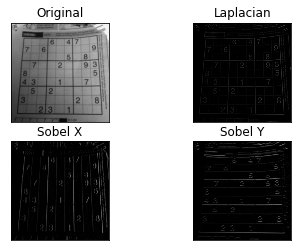

In [50]:
#basic high-pass filtering example;
#high-pass filtering responds to derivatives, or spatial changes in 
#images
img = cv2.imread('sudokubig.jpg',0)
 
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
figure()
subplot(2,2,1),imshow(img,cmap = 'gray')
title('Original'), xticks([]), plt.yticks([])
subplot(2,2,2),imshow(laplacian,cmap='gray')
title('Laplacian'), xticks([]), plt.yticks([])
clim([0, 45])
subplot(2,2,3),imshow(sobelx,cmap='gray')
title('Sobel X'), xticks([]), plt.yticks([])
clim([0, 4500])
subplot(2,2,4),imshow(sobely,cmap='gray')
title('Sobel Y'), xticks([]), plt.yticks([])
clim([0, 4500])



#Canny edge detection
#read about the theory here:
#http://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

img = cv2.imread('messi5.jpg',0) #note that the last 0 parameter converts the image to grayscale
edge=cv2.Canny(img,100,200)
 
figure()
subplot(121),imshow(img,cmap = 'gray')
title('Original Image')
subplot(122),imshow(edge,cmap = 'gray')
title('Edge Image')


Morphological Operations:
<br>Modifying binary masks
<br>
Read about the different operations here <br>
http://docs.opencv.org/3.1.0/d9/d61/tutorial_py_morphological_ops.html#gsc.tab=0

#create a doughnut/circle image/mask of 0's and 1's
yy=mgrid[-1:1:0.01,-1:1:0.01][0]
xx=yy.T
circ = 0*xx
circ [xx**2+yy**2 < 0.5**2 ]=1
circ [xx**2+yy**2 < 0.2**2 ]=0
 
#many different kernel types depending on application
#let's just stick with a simple box kernel
kernel = ones((10,10),float32)

#now let's try the some of the different morphological operations
erosion = cv2.erode(circ,kernel,iterations=1)

dilation = cv2.dilate(circ,kernel,iterations=1)

floodfilled = cv2.floodFill(image=circ.astype(uint8).copy(),mask=None,seedPoint=(100,100),newVal=1)
 
figure()
subplot(1,4,1)
imshow(circ,cmap='gray')
title('doughnut')
subplot(1,4,2)
imshow(erosion,cmap='gray')
title('eroded')
subplot(1,4,3)
imshow(dilation,cmap='gray')
title('dilated')
subplot(1,4,4)
imshow(floodfilled[1].astype(float32),cmap='gray')
title('flood-filled')

Adaptive Thresholding

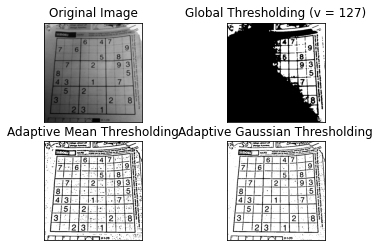

In [51]:
#compare hard thresholding to adaptive thresholding
img = cv2.imread('sudokubig.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

figure()
for i in range(4):
    subplot(2,2,i+1),plt.imshow(images[i],'gray')
    title(titles[i])
    xticks([]),yticks([])
    

In [36]:
%cd ../python


/home/jack/Desktop/dl_course/mcut_dl_day2_2/python


In [38]:
#interactive widget example
#demonstrates multiple OpenCV functions, including DFT/FFT
#along with Weiner deconvolution
#https://en.wikipedia.org/wiki/Wiener_deconvolution

%pylab inline
#make sure to use "inline" instead of "notebook" when using widgets
import cv2
import sys
from ipywidgets import interact
rcParams['figure.figsize'] = (15.0, 12.0)

def blur_edge(img, d=31):
    h, w  = img.shape[:2]
    img_pad = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_WRAP)
    img_blur = cv2.GaussianBlur(img_pad, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
    y, x = np.indices((h, w))
    dist = np.dstack([x, w-x-1, y, h-y-1]).min(-1)
    w = np.minimum(np.float32(dist)/d, 1.0)
    return img*w + img_blur*(1-w)

def motion_kernel(angle, d, sz=65):
    kern = np.ones((1, d), np.float32)
    c, s = np.cos(angle), np.sin(angle)
    A = np.float32([[c, -s, 0], [s, c, 0]])
    sz2 = sz // 2
    A[:,2] = (sz2, sz2) - np.dot(A[:,:2], ((d-1)*0.5, 0))
    kern = cv2.warpAffine(kern, A, (sz, sz), flags=cv2.INTER_CUBIC)
    return kern


def update(angle,d,noise):

    noise = 10**(-0.1*noise)
    ang = deg2rad(angle)

    psf = motion_kernel(ang, d)


    psf /= psf.sum()
    psf_pad = np.zeros_like(img)
    kh, kw = psf.shape
    psf_pad[:kh, :kw] = psf
    PSF = cv2.dft(psf_pad, flags=cv2.DFT_COMPLEX_OUTPUT, nonzeroRows = kh)
    PSF2 = (PSF**2).sum(-1)
    iPSF = PSF / (PSF2 + noise)[...,np.newaxis]
    RES = cv2.mulSpectrums(IMG, iPSF, 0)
    res = cv2.idft(RES, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT )
    res = np.roll(res, -kh//2, 0)
    res = np.roll(res, -kw//2, 1)

    subplot(1,2,1)
    imshow(psf,cmap='gray')
    subplot(1,2,2)
    imshow(res,cmap='gray')


fn = '../data/licenseplate_motion.jpg'

img = cv2.imread(fn, 0)
if img is None:
    print('failed to load img')

img = np.float32(img)/255.0

img = blur_edge(img)
IMG = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)


interact(update,angle=(0.0,180,1),d=(0,50,1),noise=(0.0,50,1))



Populating the interactive namespace from numpy and matplotlib


interactive(children=(FloatSlider(value=90.0, description='angle', max=180.0, step=1.0), IntSlider(value=25, d…

<function __main__.update(angle, d, noise)>

Suggested exercise:<br>
Make a script that let's you do hard-thresholding with a slider-controlled threshold level and view the result.
Do similarly for blurring methods.

In [ ]:
#now let's study some GUI features in OpenCV
%cd ../python/
%run inpaint.py


Study deconvolution.py to see how to create trackbars in OpenCV windows
